In [1]:
import gym
import random
import numpy as np
from keras.models     import Sequential
from keras.layers     import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
env = gym.make('MountainCar-v0')
env.reset()
goal_steps = 200
score_requirement = -198
intial_games = 10000

In [3]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            if observation[0] > -0.2:  # self-defined reward
                reward = 1
            
            score += reward   
            if done:  # done in wiki: position>0.5 
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:  # one-hot code
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])
        
        env.reset()
    
    print(accepted_scores)
    
    return training_data

In [4]:
training_data = model_data_preparation()

[-164.0, -194.0, -190.0, -184.0, -190.0, -178.0, -176.0, -176.0, -190.0, -194.0, -184.0, -180.0, -188.0, -162.0, -164.0, -180.0, -190.0, -162.0, -180.0, -184.0, -190.0, -170.0, -180.0, -172.0, -184.0, -182.0, -172.0, -186.0, -194.0, -188.0, -184.0, -184.0, -170.0, -184.0, -182.0, -190.0, -174.0, -192.0, -192.0]


#### 1

In [13]:
%%time

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam()) # keras.losses.categorical_crossentropy

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        # Uncomment this line if you want to see how our bot playing
        # env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   # default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores1_order = np.sort(scores)
avg_scores1 = sum(scores)/len(scores)
scores1_order

Epoch 1/5
7761/7761 [==============================] - 1s 109us/step - loss: 0.2308
Epoch 2/5
7761/7761 [==============================] - 0s 40us/step - loss: 0.2221
Epoch 3/5
7761/7761 [==============================] - 0s 42us/step - loss: 0.2217
Epoch 4/5
7761/7761 [==============================] - 0s 43us/step - loss: 0.2210
Epoch 5/5
7761/7761 [==============================] - 0s 43us/step - loss: 0.2206
Wall time: 7.2 s


array([-200., -200., -200., -200., -200., -200., -200., -191., -190.,
       -189., -189., -189., -186., -185., -182., -179., -177., -176.,
       -176., -176., -175., -175., -175., -174., -174., -173., -173.,
       -172., -172., -172., -172., -172., -172., -172., -172., -172.,
       -172., -171., -171., -171., -171., -171., -171., -171., -171.,
       -171., -171., -171., -170., -170., -170., -170., -170., -170.,
       -170., -170., -170., -125., -119., -117., -114., -113., -108.,
       -106., -102., -101., -101.,  -99.,  -99.,  -99.,  -98.,  -98.,
        -97.,  -97.,  -97.,  -97.,  -97.,  -95.,  -95.,  -95.,  -95.,
        -95.,  -95.,  -94.,  -94.,  -94.,  -94.,  -94.,  -94.,  -93.,
        -93.,  -92.,  -92.,  -92.,  -92.,  -92.,  -92.,  -91.,  -91.,
        -91.])

#### 2

In [12]:
%%time 

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mean_absolute_error', optimizer=Adam()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        # Uncomment this line if you want to see how our bot playing
        # env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   ## default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores2_order = np.sort(scores)
avg_scores2 = sum(scores)/len(scores)
scores2_order

Epoch 1/5
7761/7761 [==============================] - 1s 105us/step - loss: 0.3350
Epoch 2/5
7761/7761 [==============================] - 0s 43us/step - loss: 0.3344
Epoch 3/5
7761/7761 [==============================] - 0s 54us/step - loss: 0.3343
Epoch 4/5
7761/7761 [==============================] - 1s 71us/step - loss: 0.3341
Epoch 5/5
7761/7761 [==============================] - 1s 70us/step - loss: 0.3341
Wall time: 9.76 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

#### 3

In [10]:
%%time
def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   ## default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores3_order = np.sort(scores)
avg_scores3 = sum(scores)/len(scores)
scores3_order

Epoch 1/5
7761/7761 [==============================] - 1s 145us/step - loss: 0.1257
Epoch 2/5
7761/7761 [==============================] - 0s 50us/step - loss: 0.1246
Epoch 3/5
7761/7761 [==============================] - 0s 63us/step - loss: 0.1245
Epoch 4/5
7761/7761 [==============================] - 0s 43us/step - loss: 0.1243
Epoch 5/5
7761/7761 [==============================] - 0s 42us/step - loss: 0.1243
Wall time: 9.89 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

#### 4

In [19]:
%%time
def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='logcosh', optimizer=Adam()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   # default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores4_order = np.sort(scores)
avg_scores4 = sum(scores)/len(scores)
scores4_order

Epoch 1/5
7761/7761 [==============================] - 1s 162us/step - loss: 0.1071
Epoch 2/5
7761/7761 [==============================] - 0s 52us/step - loss: 0.1051
Epoch 3/5
7761/7761 [==============================] - 0s 50us/step - loss: 0.1048
Epoch 4/5
7761/7761 [==============================] - 0s 49us/step - loss: 0.1045
Epoch 5/5
7761/7761 [==============================] - 0s 47us/step - loss: 0.1044
Wall time: 9.11 s


array([-200., -198., -189., -184., -182., -181., -178., -177., -177.,
       -177., -176., -176., -176., -175., -175., -174., -174., -174.,
       -174., -173., -173., -172., -172., -171., -171., -171., -171.,
       -170., -170., -169., -169., -169., -169., -169., -169., -168.,
       -168., -168., -168., -168., -167., -167., -167., -167., -166.,
       -166., -166., -166., -166., -166., -166., -166., -166., -166.,
       -166., -166., -166., -166., -166., -166., -166., -166., -165.,
       -165., -165., -165., -165., -165., -165., -165., -165., -165.,
       -165., -165., -165., -164., -164., -164., -103., -101., -101.,
       -100.,  -98.,  -96.,  -95.,  -95.,  -95.,  -95.,  -94.,  -94.,
        -92.,  -92.,  -92.,  -91.,  -91.,  -90.,  -89.,  -89.,  -89.,
        -89.])

#### 6

In [21]:
%%time
def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='squared_hinge', optimizer=Adam()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   ## default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores6_order = np.sort(scores)
avg_scores6 = sum(scores)/len(scores)
scores6_order

Epoch 1/5
7761/7761 [==============================] - 1s 174us/step - loss: 0.7020
Epoch 2/5
7761/7761 [==============================] - 0s 44us/step - loss: 0.6667
Epoch 3/5
7761/7761 [==============================] - 0s 49us/step - loss: 0.6667
Epoch 4/5
7761/7761 [==============================] - 0s 46us/step - loss: 0.6667
Epoch 5/5
7761/7761 [==============================] - 0s 44us/step - loss: 0.6667
Wall time: 11.2 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -140.])

#### 7

In [24]:
%%time
def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='hinge', optimizer=Adam()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   ## default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores7_order = np.sort(scores)
avg_scores7 = sum(scores)/len(scores)
scores7_order

Epoch 1/5
7761/7761 [==============================] - 1s 162us/step - loss: 0.7026
Epoch 2/5
7761/7761 [==============================] - 1s 97us/step - loss: 0.6667
Epoch 3/5
7761/7761 [==============================] - 0s 45us/step - loss: 0.6667
Epoch 4/5
7761/7761 [==============================] - 0s 49us/step - loss: 0.6667
Epoch 5/5
7761/7761 [==============================] - 0s 48us/step - loss: 0.6667
Wall time: 11.6 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

### plot

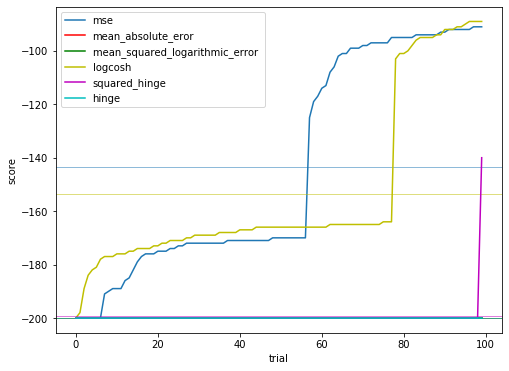

In [42]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(scores1_order,label='mse')
ax.axhline(avg_scores1, linewidth=0.5)  # color='blue', linewidth=0.5

ax.plot(scores2_order, color='r',label='mean_absolute_eror')
ax.axhline(avg_scores2, color='r',linewidth=0.5)

ax.plot(scores3_order, color='g',label='mean_squared_logarithmic_error ')
ax.axhline(avg_scores3, color='g',linewidth=0.5)

ax.plot(scores4_order, color='y',label='logcosh')
ax.axhline(avg_scores4, color='y',linewidth=0.5)

# ax.plot(scores5_order, color='m',label='mean_squared_logarithmic_error')
# ax.axhline(avg_scores5, color='m',linewidth=0.5)

ax.plot(scores6_order, color='m',label='squared_hinge')
ax.axhline(avg_scores6, color='m',linewidth=0.5)

ax.plot(scores7_order, color='c',label='hinge')
ax.axhline(avg_scores7, color='c',linewidth=0.5)

ax.legend(loc='upper left')
ax.margins(0.05)
#ax.set_title('results with different loss')
ax.set_xlabel('trial')
ax.set_ylabel('score')

plt.savefig('loss.png')
# ax.set_rasterized(True)
# plt.savefig('loss.eps', format='eps')

plt.show()